<a href="https://colab.research.google.com/github/cealer/PredictSalariesService/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

In [73]:
#read our data
dataset = pd.read_csv('/content/salaries.csv')
dataset.head()

,Experience,Salary
0,1,15000
1,1,15000
2,2,18500
3,2,18000
4,2,18550


In [45]:
#30 rows 2 columns
#Knowing our data
dataset.shape

(30, 2)

In [0]:
#iloc to locate the data
#years of experience
x = dataset.iloc[:, [0]]
#salaries
y = dataset.iloc[:, [1]]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,
                 #80% training
                 #20% test
                 test_size = 0.2,
                 #Have the same data
                 random_state= 0)

In [76]:
# Create Model
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

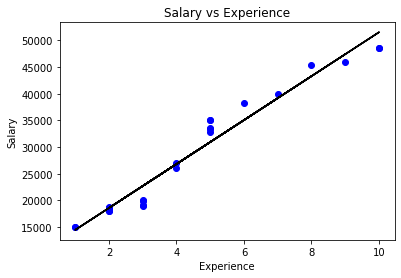

In [86]:
viz_train = plt
#Permite mostrar la informacion de los datos de entrenamiento
viz_train.scatter(X_train, Y_train, color='blue')
viz_train.plot(X_train,regressor.predict(X_train), color = 'black')
viz_train.title('Salary vs Experience')
viz_train.xlabel('Experience')
viz_train.ylabel('Salary')
viz_train.show()

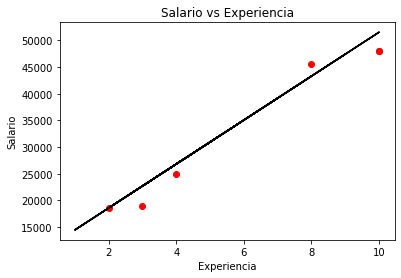

In [78]:
viz_train = plt
#Permite mostrar la informacion de los datos de entrenamiento
viz_train.scatter(X_test, Y_test, color='red')
viz_train.plot(X_train,regressor.predict(X_train), color = 'black')
viz_train.title('Salary vs Experience')
viz_train.xlabel('Experience')
viz_train.ylabel('Salary')
viz_train.show()

In [79]:
regressor.score(X_test,Y_test)
#Our score is 95%

0.9561583526086008

In [85]:
#We can test our model with any value
regressor.predict([[2]])

array([[18591.10369635]])

In [0]:
#Now we'll export the model to expose it in a API REST
import pickle

In [0]:
#Create a file to save our model
with open('model_pickle','wb') as f:
  pickle.dump(regressor,f)

In [89]:
#create a test data
x = np.array([8]).reshape(-1,1)
print(x)

[[8]]


In [90]:
#testing our model exported
with open('model_pickle','rb') as f:
  mp = pickle.load(f)
x = np.array([8]).reshape(-1,1)
mp.predict(x)

array([[43298.5455222]])